<a href="https://colab.research.google.com/github/nhareesha/MLAI/blob/main/LLM/finetuned/vector_database_weaviate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install weaviate-client

In [23]:
import weaviate
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Connect to Weaviate client

In [3]:
import weaviate
from weaviate import Client
from weaviate.classes.init import Auth
from weaviate.classes.query import MetadataQuery



# Create the client
weaviate_url = "https://4imug9qptkcm4gh9f5jra.c0.us-west3.gcp.weaviate.cloud"
weaviate_api_key = "5SPgaHOYR34qNLBzKCFe8Y0QcrUQCxIaRnOO"

# Connect to Weaviate Cloud
client = weaviate.connect_to_weaviate_cloud(
    cluster_url=weaviate_url,
    auth_credentials=Auth.api_key(weaviate_api_key),
)

print(client.is_ready())

True


-  "vectorizer": "none", made this node because I will be generating the embedding from emebedding model.


In [51]:
import json

schema = {
    "classes": [
        {
            "class": "Article",
            "description": "A class for storing articles with semantic vectors",
            "properties": [
                {"name": "title", "dataType": ["string"]},
                {"name": "content", "dataType": ["string"]},
                {"name": "category", "dataType": ["string"]},
            ],
            "vectorizer": "none", # Embedding will be generated
            "vectorIndexType": "hnsw"  # Explicitly set HNSW
        }
    ]
}

In [5]:
pip install sentence-transformers


In [6]:
from sentence_transformers import SentenceTransformer


# Check models and dimensions avaialble

In [7]:

model_names = [
    "all-mpnet-base-v2",
    "all-MiniLM-L6-v2",
    "multi-qa-mpnet-base-dot-v1",
    "paraphrase-MiniLM-L6-v2"
]


for model_name in model_names:
  model = SentenceTransformer(model_name)
  sentences = ["This is a test senetence to check model dimensions"]
  embeddings = model.encode(sentences)
  print(f"Model: {model_name}, Embedding shape: {embeddings.shape}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Model: all-mpnet-base-v2, Embedding shape: (1, 768)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Model: all-MiniLM-L6-v2, Embedding shape: (1, 384)


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/8.71k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Model: multi-qa-mpnet-base-dot-v1, Embedding shape: (1, 768)


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Model: paraphrase-MiniLM-L6-v2, Embedding shape: (1, 384)


In [8]:

model_sentence_bert = SentenceTransformer('all-MiniLM-L6-v2')  # Lightweight SBERT model



# Data Synthesis

In [64]:
# Example Articles
# articles = [
#     {"title": "Introduction to AI", "content": "Artificial Intelligence is transforming the world.", "category": "Technology"},
#     {"title": "Healthy Eating Tips", "content": "A balanced diet and exercise is key to a healthy life.", "category": "Health"},
#     {"title": "Climate Change Effects", "content": "Rising temperatures are causing global issues and depleting ozone layer.", "category": "Environment"},
# ]


import random

topics = {
    "Technology": [
        "The latest advancements in quantum computing.",
        "Exploring the metaverse and virtual reality.",
        "The impact of 5G on mobile communication.",
        "Cybersecurity threats and protection strategies.",
        "The rise of artificial intelligence in healthcare."
    ],
    "Health": [
        "Benefits of regular meditation for mental well-being.",
        "Effective strategies for managing stress and anxiety.",
        "The importance of sleep for physical and cognitive health.",
        "Nutritional guidelines for a balanced diet.",
        "Preventive measures for common illnesses."
    ],
    "Environment": [
        "Renewable energy sources and their potential.",
        "The effects of deforestation on biodiversity.",
        "Sustainable practices for reducing carbon footprint.",
        "The importance of ocean conservation.",
        "Impact of plastic pollution on marine life."
    ],
    "Finance": [
        "Understanding the basics of personal finance.",
        "Investment strategies for long-term growth.",
        "The impact of inflation on the economy.",
        "Cryptocurrency and blockchain technology.",
        "Risk management in financial markets."
    ],
    "Travel": [
        "Exploring hidden gems in Southeast Asia.",
        "Budget travel tips for backpacking Europe.",
        "The best destinations for adventure tourism.",
        "Cultural experiences around the world.",
        "Sustainable travel practices for responsible tourism."
    ]
}

articles = []
num_articles = 30  # Number of articles to generate

for i in range(num_articles):
    topic = random.choice(list(topics.keys()))
    content = random.choice(topics[topic])
    title = f"{topic.capitalize()} Article {i + 1}"  # Sequential titles are better for small tests
    articles.append({
        "title": title,
        "content": content,
        "category": topic
    })

for article in articles:
    print(article)
print(len(articles))
print(len(articles))

{'title': 'Environment Article 1', 'content': 'Renewable energy sources and their potential.', 'category': 'Environment'}
{'title': 'Technology Article 2', 'content': 'Cybersecurity threats and protection strategies.', 'category': 'Technology'}
{'title': 'Environment Article 3', 'content': 'Renewable energy sources and their potential.', 'category': 'Environment'}
{'title': 'Environment Article 4', 'content': 'The effects of deforestation on biodiversity.', 'category': 'Environment'}
{'title': 'Technology Article 5', 'content': 'Exploring the metaverse and virtual reality.', 'category': 'Technology'}
{'title': 'Travel Article 6', 'content': 'Exploring hidden gems in Southeast Asia.', 'category': 'Travel'}
{'title': 'Technology Article 7', 'content': 'Exploring the metaverse and virtual reality.', 'category': 'Technology'}
{'title': 'Finance Article 8', 'content': 'Cryptocurrency and blockchain technology.', 'category': 'Finance'}
{'title': 'Health Article 9', 'content': 'Preventive mea

# Add articles to Weaveit vector database

In [65]:
def get_embedding(text):
  embedding =  model_sentence_bert.encode(text).tolist()
  # print(embedding)
  return embedding

collection = client.collections.get("MyCollection")

with collection.batch.dynamic() as batch:
    for i, data_row in enumerate(articles):
        batch.add_object(
            properties=data_row,
            vector=get_embedding(data_row["content"])
        )
print("Articles added to Weaviate!")



Articles added to Weaviate!


In [66]:
# Query string
query = "What are the effects of global warming?"


query_embedding = get_embedding(query) # its a list


response = collection.query.near_vector(
    near_vector=query_embedding, # your query vector goes here
    limit=2,
    return_metadata=MetadataQuery(distance=True)
)


In [67]:
print(len(query_embedding))

384


In [68]:
for o in response.objects:
    print(o.properties)
    print(o.metadata.distance)



{'content': 'The effects of deforestation on biodiversity.', 'title': 'Environment Article 4', 'category': 'Environment'}
0.6147304177284241
{'content': 'The importance of ocean conservation.', 'title': 'Environment Article 29', 'category': 'Environment'}
0.6375518441200256


#Plotting Embeddings

In [69]:
all_vectors = [None] * len(articles)  # Initialize all_vectors with the correct size

all_vectors = [get_embedding(article["content"]) for article in articles]




In [70]:
all_vectors_array = np.array(all_vectors)



In [71]:
print(all_vectors_array.shape)

(30, 384)


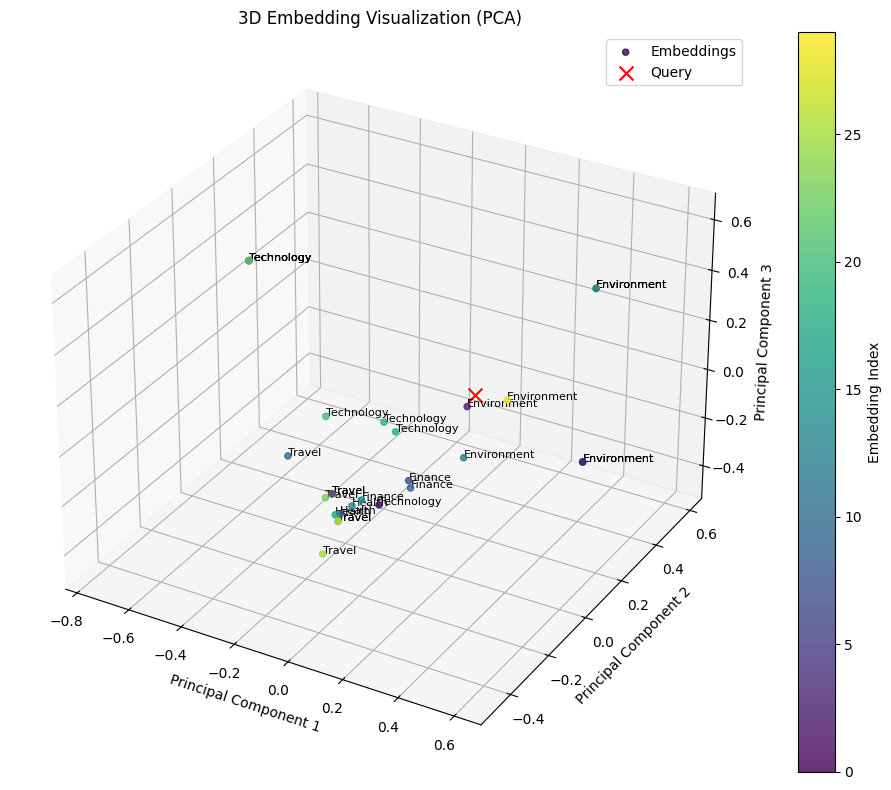

In [73]:


def plot_embeddings_3d(embeddings, labels=None, query_embedding=None, query_label="Query"):
    """
    Plots embeddings in 3D using PCA for dimensionality reduction.

    Args:
        embeddings: A NumPy array of embeddings (N x D), where N is the number of embeddings and D is the dimensionality.
        labels: A list of labels for each embedding (optional).
        query_embedding: A single query embedding (1 x D) to highlight (optional).
        query_label: Label for the query point.
    """

    if embeddings.shape[1] > 3:  # Need to reduce to 3D if higher
        pca = PCA(n_components=3)
        reduced_embeddings = pca.fit_transform(embeddings)
        if query_embedding is not None:
            reduced_query = pca.transform(query_embedding.reshape(1, -1))

    else:
        reduced_embeddings = embeddings
        if query_embedding is not None:
            reduced_query = query_embedding.reshape(1, -1)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    x = reduced_embeddings[:, 0]
    y = reduced_embeddings[:, 1]
    z = reduced_embeddings[:, 2]

    scatter = ax.scatter(x, y, z, c=np.arange(len(x)), cmap='viridis', alpha=0.8, label="Embeddings")  # Color by index

    if labels is not None:
        for i, label in enumerate(labels):
            ax.text(x[i], y[i], z[i], label, fontsize=8)

    if query_embedding is not None:
        ax.scatter(reduced_query[:, 0], reduced_query[:, 1], reduced_query[:, 2], c='red', marker='x', s=100, label=query_label)

    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title('3D Embedding Visualization (PCA)')
    ax.legend()
    # ax.grid(False)
    plt.colorbar(scatter, label="Embedding Index")
    plt.tight_layout()
    plt.show()


labels = [article["category"] for article in articles]

query_embedding_array = np.array(query_embedding)
plot_embeddings_3d(all_vectors_array, labels = labels,  query_embedding = query_embedding_array)
